In [1]:
import pandas as pd
import numpy as np

# Optical Fibre and It's Properties. 

## Usage 
While creating any optical fibre you must provide the following details 
- n1, n2, and profile type (the default profile is step index)
or 
- n1 and refractive index difference

The model will throw an error if incomplete information is provided. 

ex1

`myfibre = OpticalFibre(core_n=1.46, cladding_n=1.39, index="Graded")`

ex2

`myfibre = OpticalFibre(core_n=1.46, refractive_index_difference=0.01, index="Step")`


invalid entry

`myfibre = OpticalFibre(index="Step")`

or 

`myfibre = OpticalFibre(refractive_index_difference=0.01, index="Step")`

Then you can see all the intrensic model parameters :

```
Optical Fibre Properties:
Critical Angle:72.18602353338088
Acceptance Angle:26.52922450390899
Numerical Apparture:0.4466542286825459
Profile :Graded Index Fibre
```

Formulas
![Imgur](https://i.ibb.co/34Hym0K/Screenshot-2020-03-02-at-1-24-54-AM.png)

## Plotting the Profiles

**Currently only supporting alpha ==2**

The curves can then be plotted by invoking plot_profile method

![Graded](https://www.its.bldrdoc.gov/fs-1037/equats/37c_30.gif)

`fibre1.plot_profile(core_radius=30, cladding_radius=50)`

In [208]:
import math
import matplotlib.pyplot as plt


class OpticalFibre:
    def __init__(
        self,
        core_n=None,
        cladding_n=None,
        refractive_index_difference=None,
        index="Step",
    ):
        """[summary]
        
        Keyword Arguments:
            index {str} -- Type of the fibre "Step index" or "Graded Index" (default: {"Step"})
        """
        self.index = index
        if not (refractive_index_difference):
            if not (core_n) or not (cladding_n):
                raise ValueError(
                    "Incomplete information\nPlease Provide either n1, n2 or refractive index difference"
                )
            self.n1 = core_n
            self.n2 = cladding_n
            if self.n1 < self.n2:
                raise ValueError("Core Refractive Index is greater than cladding")
            self.NA = math.sqrt((self.n1 ** 2) - (self.n2 ** 2))
            self.critical_angle = math.degrees(math.asin(self.n2 / self.n1))
            self.acceptance_angle = math.degrees(math.asin(self.NA))
        else:
            if not (refractive_index_difference) or not (core_n):
                raise ValueError(
                    "Incomplete information\nPlease Provide either n1, n2 or refractive index difference"
                )
            self.delta = refractive_index_difference
            self.n1 = core_n
            self.NA = self.n1 * math.sqrt(2 * self.delta)
            self.critical_angle = math.degrees(math.asin(1 - self.delta))
            self.acceptance_angle = math.degrees(math.asin(self.NA))
            self.n2 = self.n1 * (1 - self.delta)

        print(f"Optical Fibre Properties:")
        print(f"Critical Angle:{self.critical_angle}")
        print(f"Acceptance Angle:{self.acceptance_angle}")
        print(f"Numerical Apparture:{self.NA}")
        print(f"Profile :{self.index} Index Fibre")

    def plot_profile(self, core_radius, cladding_radius, alpha=2):
        total_length = int((2 * cladding_radius))
        if self.index == "Step":
            X = [i for i in range(-int(total_length / 2), int(total_length / 2))]
            Y = [
                self.n2 if ((rad < -core_radius) or (rad > core_radius)) else self.n1
                for rad in X
            ]
        elif self.index == "Graded":
            self.delta = (self.n1 ** 2 - self.n2 ** 2) / (2 * self.n1 ** 2)
            X = [i for i in range(-int(total_length / 2), int(total_length / 2))]
            Y = [
                self.n1 * (sqrt(1 - 2 * self.delta))
                if ((rad < -core_radius) or (rad > core_radius))
                else self.n1
                * (sqrt(1 - (2 * self.delta * ((rad / core_radius) ** alpha))))
                for rad in X
            ]
        plt.plot(X, Y)
        plt.ylabel("Refractive Index")
        plt.xlabel("Radius")
        plt.show()

In [219]:
fibre1 = OpticalFibre(core_n=1.46, cladding_n=1.39, index="Graded")

Optical Fibre Properties:
Critical Angle:72.18602353338088
Acceptance Angle:26.52922450390899
Numerical Apparture:0.4466542286825459
Profile :Graded Index Fibre


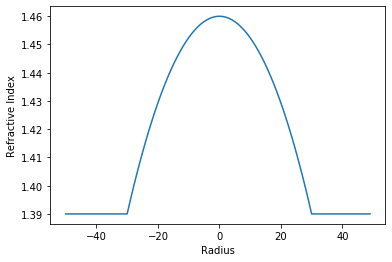

In [220]:
fibre1.plot_profile(core_radius=30, cladding_radius=50)